**TOXIC COMMENT CLASSIFICATION USING GRADIO**


 TEAM-12



*   ADISHREE.K-1RVU22BSC001
*   SRUTHI.B-1RVU22BSC013

*   SUBHASHINI.N-1RVU22BSC061






 Step 1: Install Gradio


In [1]:
!pip install gradio
!pip uninstall -y nltk
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.2 MB/s eta 0:00:00
Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.2 MB/s eta 0:00:00


Step 2: Import **Libraries**

In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import nltk
import gradio as gr

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, TextVectorization
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf


**Step 3: Download NLTK Data**

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Step 4: Load Dataset**

In [7]:
df = pd.read_csv("/content/train.csv", on_bad_lines='skip')
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


**Step 5: Text Preprocessing Function**

In [8]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\w*\d\w*", "", text)

    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)


**Step 6: Clean the Text**

In [14]:
df['clean_text'] = df['comment_text'].astype(str).apply(preprocess_text)
df[['comment_text', 'clean_text']].head()

,comment_text,clean_text
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,daww match background colour im seemingly stuc...
2,"Hey man, I'm really not trying to edit war. It...",hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",cant make real suggestion improvement wondered...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page thats


**Step 7: Plot Label Distribution**

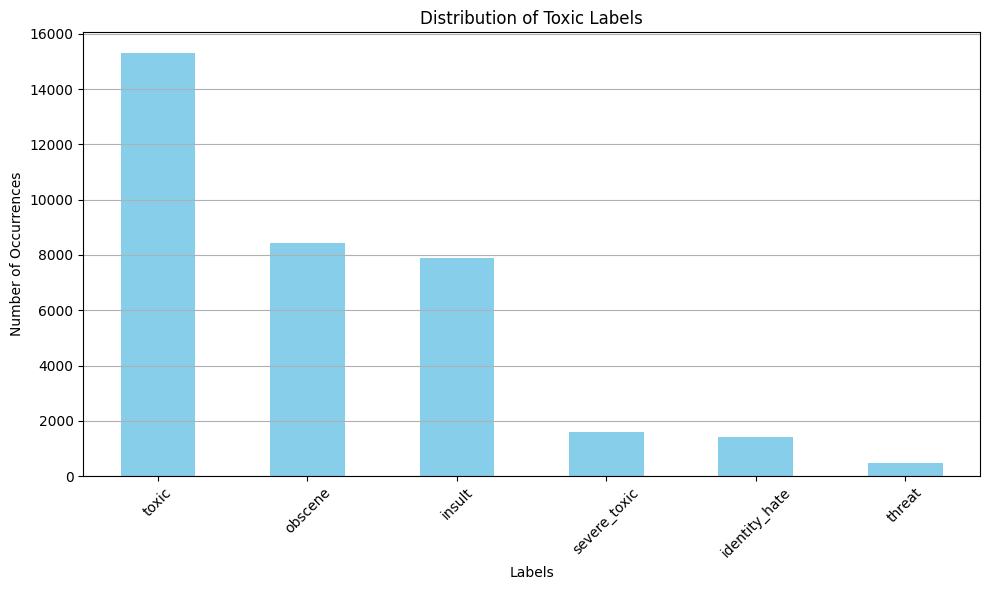

In [15]:
label_counts = df[label_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Toxic Labels")
plt.xlabel("Labels")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Step 8: Split Data**

In [18]:
# X = df['clean_text'].values
# y = df[label_cols].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split

X = df['clean_text'].values
y = df[label_cols].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (127656,)
X_test shape: (31915,)
y_train shape: (127656, 6)
y_test shape: (31915, 6)


**Step 9: Vectorize Text**

In [27]:
# Step 9: Vectorize Text and Convert to NumPy Arrays
max_vocab = 20000
max_len = 200

vectorizer = TextVectorization(max_tokens=max_vocab, output_sequence_length=max_len)
vectorizer.adapt(X_train)

# Apply vectorizer
X_train_vec = vectorizer(X_train)
X_test_vec = vectorizer(X_test)

# Convert from Tensor to NumPy array
X_train_vec = X_train_vec.numpy()
X_test_vec = X_test_vec.numpy()

# Print shapes to confirm
print(X_train_vec.shape, X_test_vec.shape)


(127656, 200) (31915, 200)


**Step 10: Build Model**

In [30]:
model = Sequential([
    Embedding(input_dim=max_vocab, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='sigmoid')
])


**Step 11: Compile Model**

In [31]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Step 12: Train Model**

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(
    X_train_vec, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(X_test_vec, y_test),
    callbacks=[early_stop]
)


Epoch 1/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 51s 42ms/step - accuracy: 0.7838 - loss: 0.1581 - val_accuracy: 0.9941 - val_loss: 0.0511
Epoch 2/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.9907 - loss: 0.0483 - val_accuracy: 0.9941 - val_loss: 0.0495
Epoch 3/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9934 - loss: 0.0443 - val_accuracy: 0.9941 - val_loss: 0.0492
Epoch 4/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9930 - loss: 0.0399 - val_accuracy: 0.9941 - val_loss: 0.0522
Epoch 5/10
998/998 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9918 - loss: 0.0361 - val_accuracy: 0.9940 - val_loss: 0.0539


**Step 13: Evaluate Model**

In [33]:

print("\nEvaluating model...")
model.summary()
y_pred = model.predict(X_test_vec)
y_pred = (y_pred > 0.5)

from sklearn.metrics import classification_report, accuracy_score

print("\n Classification Report:")
print(classification_report(y_test, y_pred))



Evaluating model...


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 200, 128)       │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,113,748 (30.95 MB)

 Trainable params: 2,704,582 (10.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,409,166 (20.63 MB)

998/998 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step

 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3056
           1       0.74      0.05      0.10       321
           2       0.86      0.76      0.81      1715
           3       0.00      0.00      0.00        74
           4       0.73      0.61      0.66      1614
           5       0.00      0.00      0.00       294

   micro avg       0.81      0.66      0.72      7074
   macro avg       0.52      0.36      0.39      7074
weighted avg       0.76      0.66      0.69      7074
 samples avg       0.07      0.06      0.06      7074



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

**Step 14: Calculate Accuracy**

In [34]:

accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")


Overall Accuracy: 0.9159


**Step 15: Prediction Function for Gradio**

In [39]:
def predict_toxicity(comment):
    cleaned = preprocess_text(comment)
    comment_vec = vectorizer([cleaned])
    pred = model.predict(comment_vec)[0]
    labels = ['Toxic', 'Severe Toxic', 'Obscene', 'Threat', 'Insult', 'Identity Hate']
    return {label: float(f"{p:.3f}") for label, p in zip(labels, pred)}

predict_toxicity("You're so stupid!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


{'Toxic': 0.98,
 'Severe Toxic': 0.059,
 'Obscene': 0.749,
 'Threat': 0.033,
 'Insult': 0.615,
 'Identity Hate': 0.087}

**Step 16: Gradio Interface**

In [40]:
interface = gr.Interface(
    fn=predict_toxicity,
    inputs=gr.Textbox(lines=3, placeholder="Enter a comment..."),
    outputs=gr.Label(num_top_classes=6),
    title="Toxic Comment Classifier",
    description="Enter a comment to classify its toxicity across 6 categories."
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e3e89f9873c2472df6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
